# CONTOURS & HIERARCHIES
`URLs`: [1](https://datacarpentry.org/image-processing/09-contours/), [2](http://snippetnuggets.com/howtos/opencv/tips/remove-children-contours-cv2-findContours-only-parents.html)

Here we'll see how to use **OpenCV** functions to find the contours of the objects in an image. 
    
    A contour is a closed curve of points or line segments, representing the boundaries of an object in an image.
    In other words, contours represent the shapes of objects found in an image.
    
If internal detail is visible in an image, the object may produce several associated contours, which are returned in a **hierarchical** data structure. Once we find the contours of the objects in an image, we can do things like: 
* determine the number of objects in an image,
* classify the shapes of the objects, or 
* measure the size of the objects. 

`NOTE 1`: **The input to the contour-finding process is a binary image**, which we will produce by first applying **thresholding** and / or **edge detection**. 
`NOTE 2`: In the binary image, **the objects we wish to detect should be *white***, while the **background of the image should be *black***.

## Edges v/s Contours

The difference between **edges** and **contours** is significant. 

When we perform **edge detection**: we find the points where the intensity of colors changes significantly, and turn those pixels ON, while turning the rest of the pixels OFF. The edge pixels are in an image, and there is no particular requirement that the pixels representing an edge are all contiguous.

**Contours**: not necessarily part of an image, unless we choose to draw them. Rather, contours are abstract collections of points and / or line segments corresponding to the shapes of the objects in the image. Thus, they can be manipulated by our programs: 
* we can count the number of contours
* use them to categorize the shapes in the object
* use them to crop objects from an image, and more. 


## Using contours to count objects

In [1]:
import cv2
from PIL import Image
import numpy as np
import random

In [2]:
image = cv2.imread('./dice.jpg')
image_copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
(t, binary) = cv2.threshold(blur,
                            195,
                            255,
                            cv2.THRESH_BINARY)

In [3]:
# Image.fromarray(image.copy())

In [4]:
# Image.fromarray(binary.copy())

In [5]:
(_, contours, _) = cv2.findContours(binary,
                                    cv2.RETR_EXTERNAL,
                                    cv2.CHAIN_APPROX_SIMPLE)

In [6]:
cv2.drawContours(image,
                contours,
                -1,
                (0, 0, 255),
                5)
# Image.fromarray(image.copy())

array([[[ 63,  63,  77],
        [ 67,  67,  81],
        [ 62,  59,  74],
        ...,
        [103,  95, 105],
        [107, 100, 107],
        [108, 101, 108]],

       [[ 64,  64,  78],
        [ 64,  64,  78],
        [ 60,  57,  72],
        ...,
        [111, 103, 113],
        [114, 106, 116],
        [106, 102, 108]],

       [[ 60,  60,  74],
        [ 66,  66,  80],
        [ 69,  66,  81],
        ...,
        [112, 107, 116],
        [116, 111, 120],
        [106, 103, 112]],

       ...,

       [[ 26,  41,  43],
        [ 25,  40,  42],
        [ 29,  40,  44],
        ...,
        [ 14,  16,  10],
        [ 16,  19,  10],
        [ 19,  22,  13]],

       [[ 21,  36,  38],
        [ 23,  38,  40],
        [ 28,  39,  43],
        ...,
        [ 17,  19,  13],
        [ 20,  23,  14],
        [ 22,  27,  18]],

       [[ 24,  39,  41],
        [ 27,  42,  44],
        [ 33,  44,  48],
        ...,
        [ 16,  18,  12],
        [ 17,  22,  13],
        [ 21,  26,  17]]

In [7]:
print("Found %d objects." % len(contours))
for (i, c) in enumerate(contours):
    print("\tSize of contour %d: %d" % (i, len(c)))

Found 7 objects.
	Size of contour 0: 436
	Size of contour 1: 479
	Size of contour 2: 479
	Size of contour 3: 480
	Size of contour 4: 325
	Size of contour 5: 620
	Size of contour 6: 568


## Understanding Contour Hierarchies

In [8]:
(_, contours, hierarchy) = cv2.findContours(binary,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)

In [9]:
# Count the number of pips on the dice faces
# Iterate through hierarchy[0], first to find the indices of dice contours, then again to find pip contours.

dice = []
pips = []

# find dice contours
for (i, c) in enumerate(hierarchy[0]):
    if c[3] == -1:
        dice.append(i)

# find pip contours
for (i, c) in enumerate(hierarchy[0]):
    if c[3] in dice:
        pips.append(i)

print("Total count of all die rolls: ", len(pips))

Total count of all die rolls:  28


In [10]:
for index, contour in enumerate(contours):
    [x, y, w, h] = cv2.boundingRect(contour)
#     cX = round(int(x + int(w/2)))
#     cY = round(int(y + int(h/2)))
     
#     randomB, randomG, randomR = (random.sample(range(50,255),1)[0],
#                                  random.sample(range(50,255),1)[0],
#                                  random.sample(range(50,255),1)[0]) #returns a list
    
    randomB, randomG, randomR = (0,
                                 0,
                                 0) #returns a list

#     cv2.circle(image_copy,
#                (cX, cY),
#                4,
#                (randomB, randomG, randomR),
#                -1)#4 pixel is radius of circle(dot) and -1 flag means fill the circle with color mentioned
    
    cv2.rectangle(image_copy,
                  (x, y),
                  (x + w, y + h),
                  (randomB, randomG, randomR),
                  2)
    
    cv2.putText(image_copy,
                str(index),
                (x+20, y-5),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (200, 50, 180),
                3,
                cv2.LINE_AA)


print(hierarchy) # Order: [Next, Previous, First_Child, Parent]

print('RETR_TREE')
# Image.fromarray(image_copy.copy())

[[[ 7 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [-1  5 -1  0]
  [12  0  8 -1]
  [ 9 -1 -1  7]
  [10  8 -1  7]
  [11  9 -1  7]
  [-1 10 -1  7]
  [17  7 13 -1]
  [15 -1 14 12]
  [-1 -1 -1 13]
  [16 13 -1 12]
  [-1 15 -1 12]
  [23 12 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [-1 21 -1 17]
  [27 17 24 -1]
  [25 -1 -1 23]
  [26 24 -1 23]
  [-1 25 -1 23]
  [32 23 28 -1]
  [29 -1 -1 27]
  [30 28 -1 27]
  [31 29 -1 27]
  [-1 30 -1 27]
  [-1 27 33 -1]
  [34 -1 -1 32]
  [35 33 -1 32]
  [-1 34 -1 32]]]
RETR_TREE


[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]
RETR_EXTERNAL


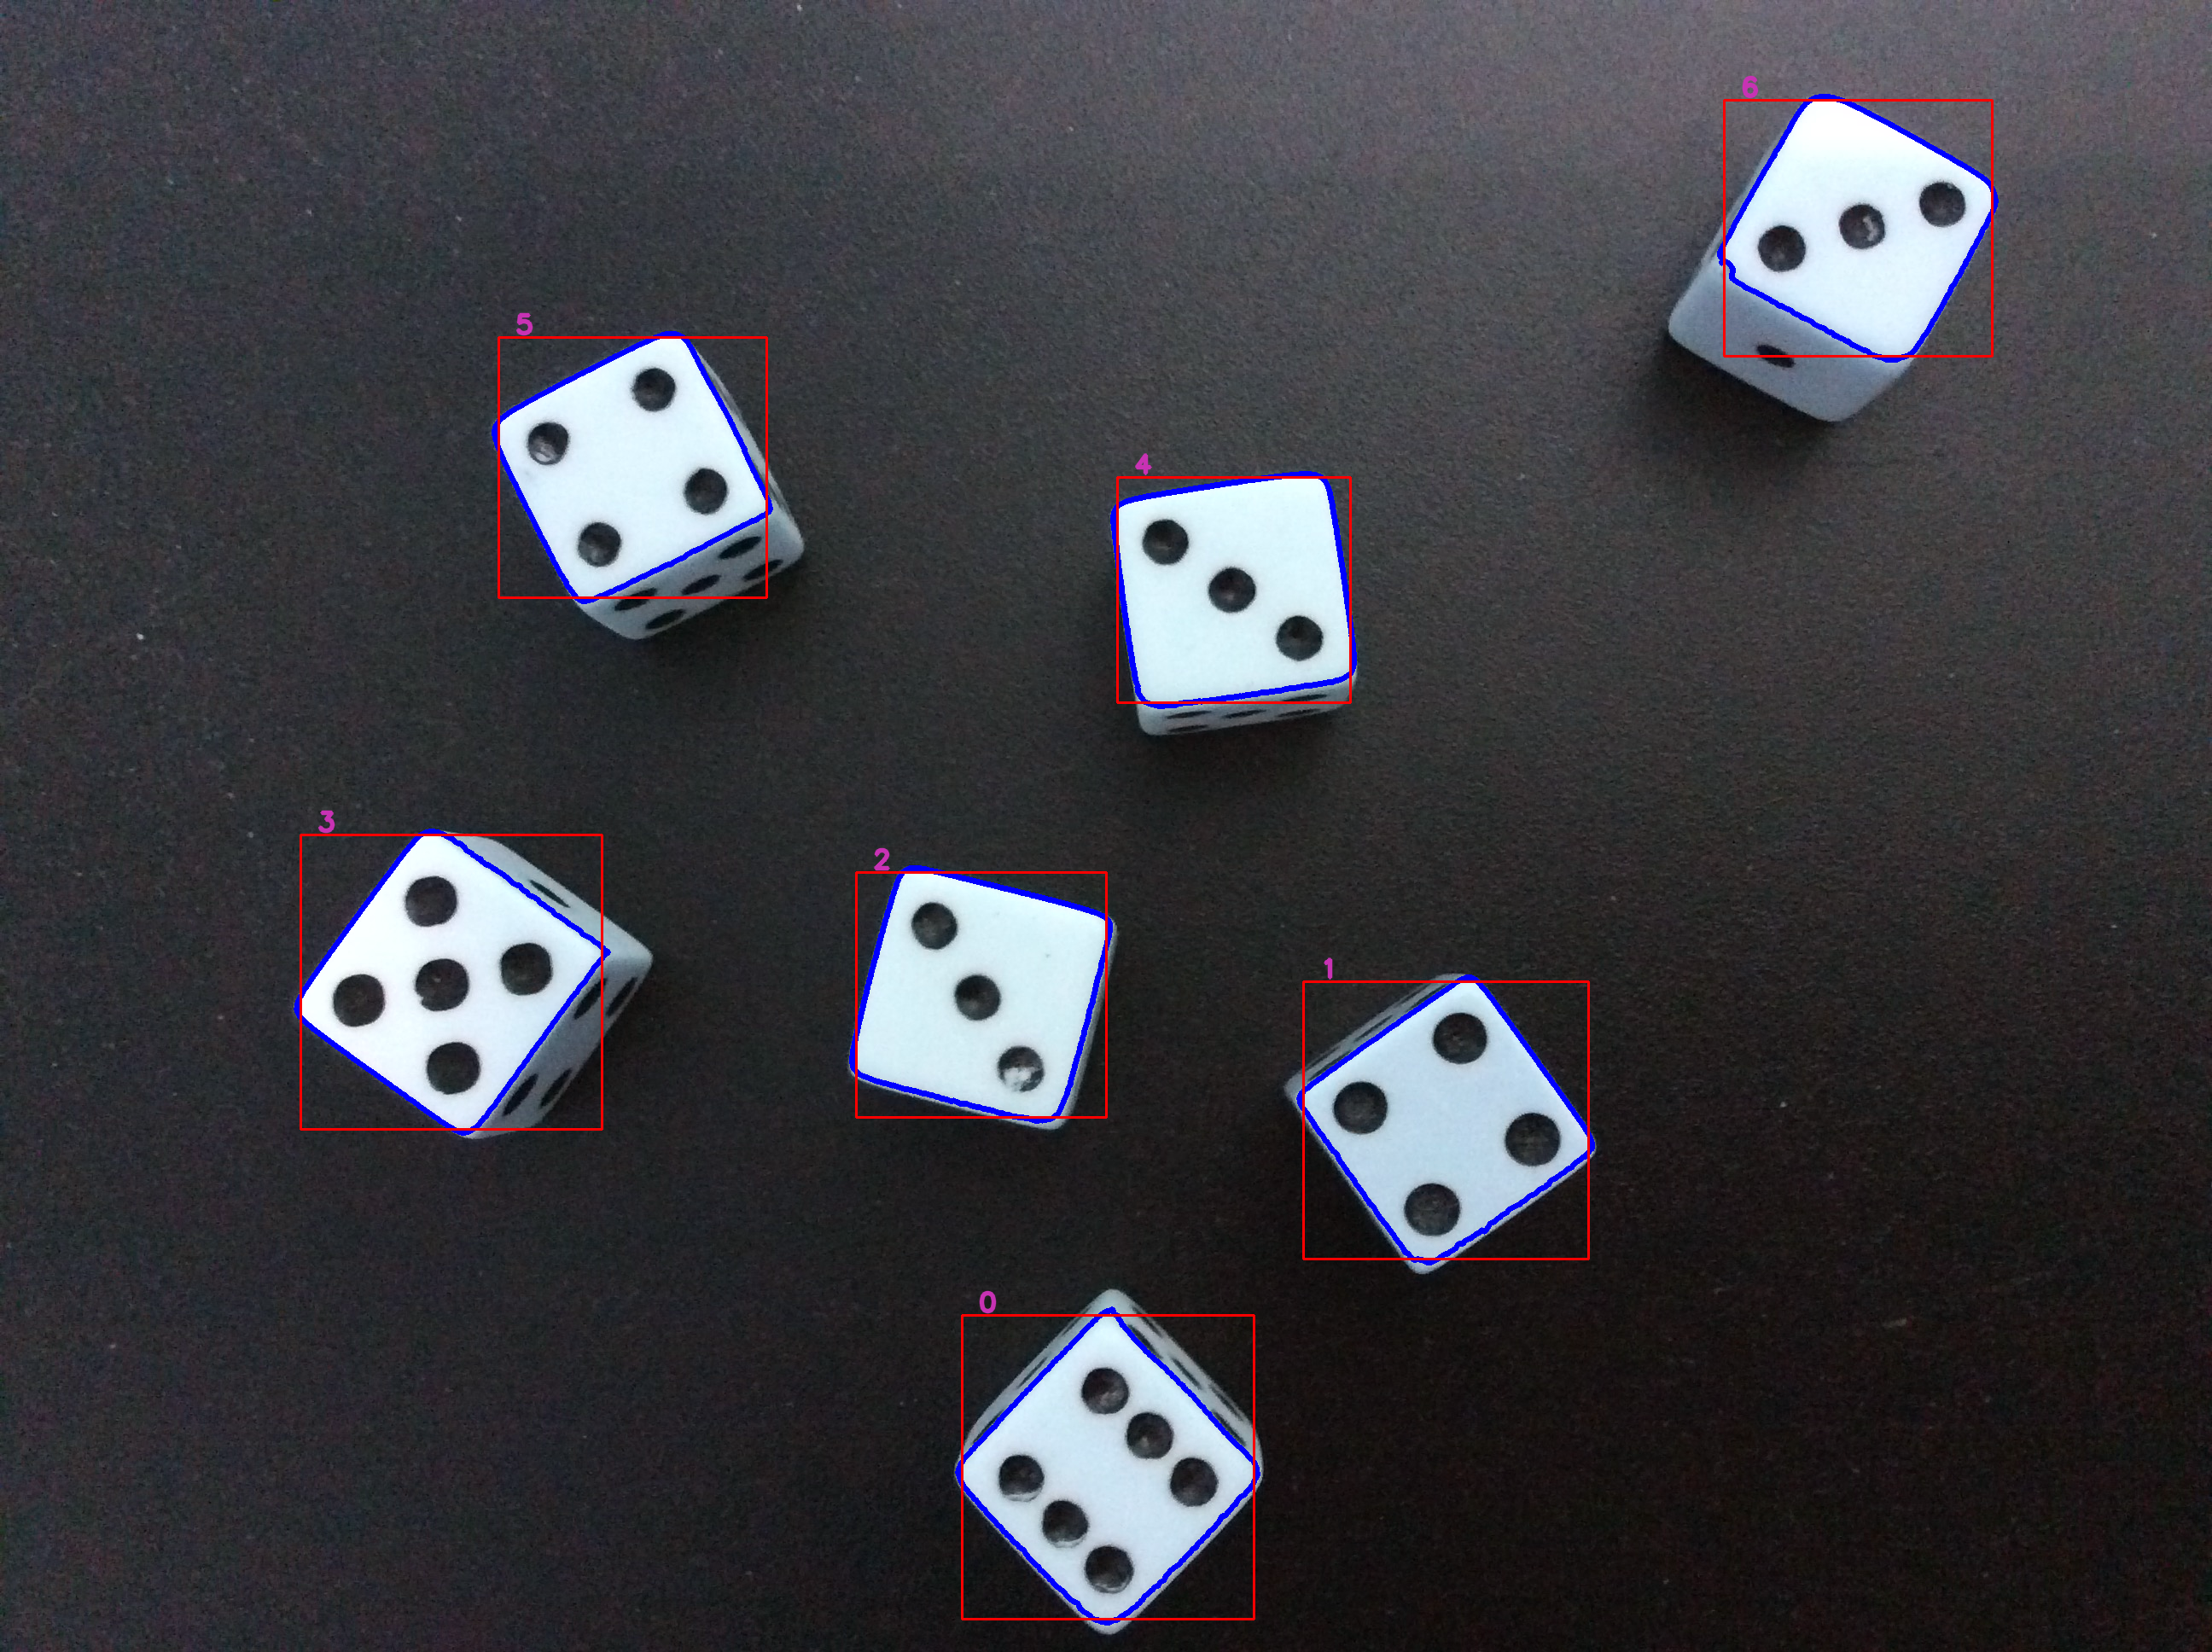

In [11]:
img = cv2.imread('./dice.jpg')
img_copy = image.copy()
gry = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gry, (5, 5), 0)
(th, binary_img) = cv2.threshold(blurred,
                            195,
                            255,
                            cv2.THRESH_BINARY)
(_, contours, hierarchy) = cv2.findContours(binary_img,
                                           cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_SIMPLE)

for index, contour in enumerate(contours):
    [x, y, w, h] = cv2.boundingRect(contour)
#     cX = round(int(x + int(w/2)))
#     cY = round(int(y + int(h/2)))    
     
#     cv2.circle(img_copy,
#                (cX, cY),
#                4,
#                (0, 0, 255),
#                -1)#4 pixel is radius of circle(dot) and -1 flag means fill the circle with color mentioned
    
    cv2.rectangle(img_copy,
                  (x, y),
                  (x + w, y + h),
                  (255, 0, 0),
                  2)
    
    cv2.putText(img_copy,
                str(index),
                (x+20, y-5),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (200, 50, 180),
                3,
                cv2.LINE_AA)

print(hierarchy) # Order: [Next, Previous, First_Child, Parent]
print("RETR_EXTERNAL")
# Image.fromarray(img_copy.copy())

## Count the number of yellow dots

In [12]:
import cv2
import math
import numpy as np

In [13]:
dots = cv2.imread('./dots.jpg')
dots_copy = dots.copy()
gray_dots = cv2.cvtColor(dots_copy, cv2.COLOR_BGR2GRAY)

blur_dots = cv2.GaussianBlur(gray_dots,
                             (5, 5),
                             0)

(th_, bin_dots) = cv2.threshold(blur_dots,
                              200,
                              255,
                              cv2.THRESH_BINARY_INV)

In [14]:
# Image.fromarray(dots_copy.copy())

In [15]:
(_, contours, _) = cv2.findContours(bin_dots,
                                   cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)

In [16]:
'''
Compute distance between two colors, as a 3D Euclidean distance.
We will use this function to tell whether the average color for a dot is closest to yellow, blue, or green. 
The function simply computes the geometric distance between two three-dimensional points. 
kCol is the known color parameter and 
uCol is the unknown color parameter. 
'''

def colorDistance(kCol, uCol):
    # compute sum of square of differences between ewach channel
    d = (kCol[0] - uCol[0])**2 + (kCol[1] - uCol[1])**2 + (kCol[2] - uCol[2])**2 
    # square root of sum is the Euclidean Distance between two colors
    return math.sqrt(d)

Next block of code uses a `for` loop to determine the average size of the contours in the image. Since we are interested in the mean size of the contours, not the mean of the values in contours, we cannot simply use the NumPy `mean()` function.

In [17]:
# Determine the average length of Contour
avg = 0
for c in contours:
    avg += len(c)
    
avg /= len(contours)

The code creates an accumulator variable named `avg`, with an initial value of zero. Then, in the `for` loop, we add the length of each contour to the `avg` accumulator. 

Finally, we divide the sum of the lengths by the number of contours, yielding the average contour length.

Next, for convenience, we create tuples for each of our reference colors, **YELLOW**, **GREEN**, and **BLUE**. 

These will be passed in as the first parameter to the `colorDistance()` function when we are trying to classify the color for a contour. We use all caps to indicate that these are intended to be constants, i.e., that we should not change the values held in these variables.

In [18]:
# create reference colors
YELLOW = (0, 255, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

Before the next `for` loop that does the counting, we define another accumulator, `yellowCount`, to hold the running total of yellow dots

In [19]:
# number of yellow dots
yellowCount = 0

The main `for` loop again iterates through the contours, and we only do the counting calculations for contours that are big enough to be associated with colored dots. 

We do this with the: 

    if len(c) > avg / 2: 
        control structure
Inside the `if`, the first step is to use the moments of the current contour to find its centroid.

The `cv2.moments()` function call computes the moments for a contour. The return value of the function call is a Python dictionary that contains the various moments for the contour. The centroid, or center point, for a contour can be found by dividing specific moments. We truncate the results of the divisions to integers, and save the coordinates of the center point in the `cx` and `cy` variables.Now, we use array slicing to get the blue, green, and red color channels in a nine pixel kernel centered around the centroid of the image.

`NOTE`: The first dimension in a NumPy array holding an OpenCV image represents the y axis, the second dimension represents the x axis, and the third dimension represents the color channel, in BGR order. 

We get a nine pixel kernel around the centroid by starting each slice at `cy - 4` or `cx - 4`, and providing the index one beyond the ending coordinate with `cy + 5` or `cx + 5`. We save the blue, green, and red color layers in the variables `b`, `g`, and `r`, respectively.

We determine the average blue, green, and red color values using the `np.mean()` function, saving the results in `bAvg`, `gAvg`, and `rAvg`.

We find the difference between the average color and the three reference colors, and save the three results in a list.

After this block is complete, the `dist` list contains the distance between the average color and the yellow, blue, and green reference colors, in that order. 

So, **if the smallest distance in the list is in position zero of the list, we will classify this dot as being yellow.** That is what is happening in the final piece of code in the `if` statement within the `for` loop

In [20]:
# for each contour...
for c in contours:
    if len(c) > avg / 2:
        # find centroid of shape
        M = cv2.moments(array = c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # find average color for 9 pixel kernel around centroid
        b = img[cy - 4 : cy + 5, cx - 4 : cx + 5, 0]
        g = img[cy - 4 : cy + 5, cx - 4 : cx + 5, 1]
        r = img[cy - 4 : cy + 5, cx - 4 : cx + 5, 2]

        bAvg = np.mean(b)
        gAvg = np.mean(g)
        rAvg = np.mean(r)
        
        # find distances to known reference colors
        dist = []
        dist.append(colorDistance(YELLOW, (bAvg, gAvg, rAvg)))
        dist.append(colorDistance(BLUE, (bAvg, gAvg, rAvg)))
        dist.append(colorDistance(GREEN, (bAvg, gAvg, rAvg)))
        
        # which one is closest?
        minDist = min(dist)
        # if it was yellow, count the shape
        if dist.index(minDist) == 0:
            yellowCount += 1

print("Yellow dots:", yellowCount)

Yellow dots: 6


## Measuring size based on a reference object